# Cloud-Mask

Unsupervised Machine Learning Algorithm to create a Cloud-Mask using Landsat 8 Satellite images.

<b>Imports

In [1]:
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np
import imageio
import cv2

<b>Get the Tifs

In [2]:
dir = "/home/sansigolo/Documents/git/CAP-240-394/"

try:
	B3 = gdal.Open(dir+'LC08_L1TP_221067_20170113_20170311_01_T1_B3_C.TIF')
	B4 = gdal.Open(dir+'LC08_L1TP_221067_20170113_20170311_01_T1_B4_C.TIF')
	B5 = gdal.Open(dir+'LC08_L1TP_221067_20170113_20170311_01_T1_B5_C.TIF')
	print ("Arquivos aberto com sucesso!")
except:
	print("Erro na abertura dos arquivo!")
	exit()

Arquivos aberto com sucesso!


<b>Read Raster Bands

In [3]:
band_3 = B3.GetRasterBand(1)
band_4 = B4.GetRasterBand(1)
band_5 = B5.GetRasterBand(1)

<b>Trasform in Numpy Array

In [4]:
array_B3 = band_3.ReadAsArray().astype(np.float32)
array_B4 = band_4.ReadAsArray().astype(np.float32)
array_B5 = band_5.ReadAsArray().astype(np.float32)

<b>Create Fake-Color Band

In [5]:
img = array_B3 + array_B4 + array_B5

<b>Plot

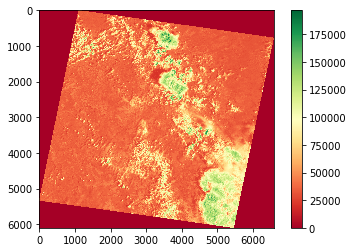

In [6]:
plt.imshow(img, cmap='RdYlGn')
plt.colorbar()
plt.show()

<b>Convert to Float32

In [7]:
img = imageio.imwrite('outfile.jpg', img)
img = cv2.imread('outfile.jpg')
Z = img.reshape((-1,3))
Z = np.float32(Z)

<b>Define and Apply KMeans()

In [8]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

<b>Make the Image

In [9]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

<b>Set Mask

In [10]:
lower_cloud = np.array([51,51,51])
upper_cloud = np.array([149,149,149])

<b>Cut

In [11]:
mask = cv2.inRange(res2, lower_cloud, upper_cloud)

<b>Plot

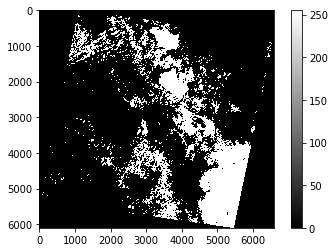

In [12]:
plt.imshow(mask, cmap='gray')
plt.colorbar()
plt.show()

<b>Fix

In [13]:
mask = np.select([mask <= 0, mask>=1], [np.ones_like(mask), np.full_like(mask, 3, dtype=np.int8)])

<b>Save

In [14]:
filename_output = "data/LC08_L1TP_221067_20170926_20171013_01_T1_CLD.TIF"
geotiff = gdal.GetDriverByName('GTiff')
dataset_output = geotiff.Create(filename_output, B3.RasterXSize, B3.RasterYSize, 1, gdal.GDT_Int16)
dataset_output.SetGeoTransform(B3.GetGeoTransform())
dataset_output.SetProjection(B3.GetProjectionRef())
dataset_output.GetRasterBand(1).WriteArray(mask)
dataset_output.FlushCache()
dataset_output = None
print ("Arquivos salvo com sucesso!")

Arquivos salvo com sucesso!
